# Features
- Presence of ingredient (0/1)
- % nutrient (e.g. fat)

# Preprocessing
- Map all ingredients to a unique index

- Map nutrient info to a category (high fat, high carb)

- Map total time to category (fast, medium, slow)

- Map cuisine to a unique index

# Visualization
- NA data distribution

- Ingredients distribution

- Time distribution by dataset

- Nutrient info by dataset

- Clustering, compared to title names

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import pandas as pd
import numpy as np
from save_recipes import agg_data

In [279]:
!python save_recipes.py

61 datasets found
61 0 0 0
number of recipes 2046
saving to clean_data/mains/mains_url_index_mapping.csv

saving to clean_data/mains/mains_recipes_nutrient.csv


In [278]:
!python save_recipes.py -f

61 datasets found
53 8 0 5
number of recipes 1740
number of recipes 362
number of recipes 221
saving to clean_data/mains/mains_filter_url_index_mapping.csv

saving to clean_data/mains/mains_filter_recipes_nutrient.csv
saving to clean_data/desserts/desserts_filter_url_index_mapping.csv

saving to clean_data/desserts/desserts_filter_recipes_nutrient.csv
saving to clean_data/sides/sides_filter_url_index_mapping.csv

saving to clean_data/sides/sides_filter_recipes_nutrient.csv


In [276]:
!python get_embeddings.py

saving to clean_data/mains/nutrient_features.csv

Using 452 unigrams that occur over 20 times
Using 440 bigrams that occur over 20 times
saving to clean_data/mains/ing_features.csv

loading nutrient and ingredients from csv
saving to clean_data/mains/embeddings_main_filter.csv

saving to clean_data/mains/embeddings_main_filter_scaled.csv



In [99]:
main_recipes = pd.read_csv('../clean_data/mains_filter_recipes_nutrient.csv')

In [277]:
from label_recipes import get_meat_labels
get_meat_labels(main_recipes, save = True)

saving to clean_data/mains/meat_label.csv



,poultry,beef,pork,fish,seafood,lamb,veg
url,,,,,,,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,1,0,0,0,0,0,0
https://glebekitchen.com/tonkotsu-ramen-home/,0,0,1,0,0,0,0
https://glebekitchen.com/garlic-ginger-grilled-chicken/,1,0,0,0,0,0,0
https://glebekitchen.com/tonkotsu-ramen-broth-home/,0,0,1,0,0,0,0
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,0,0,0,0,0,1,0
https://thewoksoflife.com/lamb-stew-spicy-sausage/,0,1,1,0,0,1,0
https://thewoksoflife.com/lamb-stew/,0,1,0,0,0,1,0


In [274]:
from label_recipes import get_starch_labels
get_starch_labels(main_recipes, save = True)

['noodle', 'rice', 'soup', 'stew', 'salad', 'wrap', 'stir_fry']
saving to clean_data/starch_label.csv



,noodle,rice,soup,stew,salad,wrap,stir_fry
url,,,,,,,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,0,0,0,0,0,0,0
https://glebekitchen.com/tonkotsu-ramen-home/,1,0,0,0,0,0,0
https://glebekitchen.com/garlic-ginger-grilled-chicken/,0,0,0,0,0,0,0
https://glebekitchen.com/tonkotsu-ramen-broth-home/,0,0,0,0,0,0,0
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,0,0,0,0,0,0,0
https://thewoksoflife.com/lamb-stew-spicy-sausage/,0,0,0,0,0,0,0
https://thewoksoflife.com/lamb-stew/,0,1,1,1,0,0,0


In [271]:
idx = 324

main_recipes['title'].iloc[idx], main_recipes['ingredients'].apply(ast.literal_eval).iloc[idx]
# main_recipes.iloc[idx]

('Soy Milk Hot Pot',
 ['1 lb thinly sliced pork loin ((skip for vegetarian))',
  '7 oz enoki mushrooms ((1 package))',
  '3.5 oz shimeji mushrooms ((1 package))',
  '4 shiitake mushrooms',
  '¼ napa cabbage ((1.5 lb, 680 g))',
  '½ bunch mizuna (Japanese mustard green) ((or spinach or any leafy greens))',
  '1 bunch shungiku (Tong Ho/Garland Chrysanthemum) ((or any leafy greens))',
  '1 negi (long green onion) ((or leek or green onions/scallions))',
  '1 green onion/scallion',
  '1 medium-firm tofu ((14 oz, 396 g))',
  '½ daikon radish ((1 lb, 454 g))',
  '1 carrot ((3 oz, 85 g))',
  '1 gobo (burdock root) ((5.3 oz, 150 g))',
  '3 cups dashi (Japanese soup stock; click to learn more) ((720 ml) (I use Awase dashi. Kombu dashi for vegetarian/vegan))',
  '¼ cup sake ((4 Tbsp))',
  '¼ cup mirin ((4 Tbsp))',
  '2 cups unsweetened soy milk ((microwave till it’s warm))',
  '¼ cup miso ((4 Tbsp; I use awase miso))',
  '2 Tbsp toasted white sesame seeds',
  '¼ tsp kosher/sea salt (I use Diamond

In [288]:
meat_labels = pd.read_csv('../clean_data/mains/meat_labels.csv', index_col = 'url')
starch_labels = pd.read_csv('../clean_data/mains/starch_labels.csv', index_col = 'url')
taste_labels = pd.read_csv('../clean_data/mains/nutrient_features.csv', index_col = 'url')

In [298]:
all_labels = taste_labels.join(starch_labels).join(meat_labels)
all_labels = all_labels.dropna()

In [299]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [300]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(all_labels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1159 samples in 0.003s...
[t-SNE] Computed neighbors for 1159 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1159
[t-SNE] Computed conditional probabilities for sample 1159 / 1159
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.257885
[t-SNE] KL divergence after 300 iterations: 0.743153


In [320]:
def get_starch(row):
    for c in starch_labels.columns:
        if row[c]==1:
             return c
            
def get_meat(row):
    for c in meat_labels.columns:
        if row[c]==1:
             return c
            
def get_taste(row):
    for c in taste_labels.columns:
        if row[c]==1:
             return c
            
all_labels['meat'] = meat_labels.apply(get_meat, axis = 1)
all_labels['starch'] = starch_labels.apply(get_starch, axis = 1)
all_labels['taste'] = taste_labels.apply(get_taste, axis = 1)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

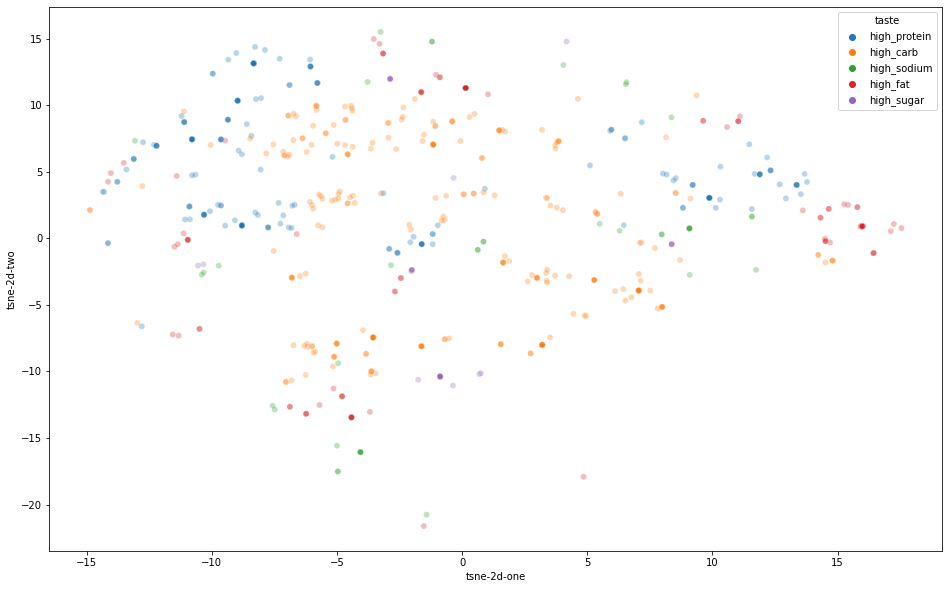

In [321]:
all_labels['tsne-2d-one'] = tsne_results[:,0]
all_labels['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="taste",
#     palette=sns.color_palette("hls", 5),
    data=all_labels,
    legend="full",
    alpha=0.3
)

In [355]:
from get_recommendations_knn import process_embeddings
embeddings_df_scaled = process_embeddings()

In [356]:
embeddings_df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03
mean,-1.874883e-16,-1.656277e-17,-3.803398e-16,-1.134916e-17,1.414736e-17,1.231856e-16,1.330197e-16,1.458214e-15,4.977457e-17,-1.302420e-15
std,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00
min,-2.361155e+00,-1.973806e+00,-1.860859e+00,-2.243552e+00,-2.736388e+00,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
25%,-7.608666e-01,-8.946493e-01,-5.307183e-01,-7.829676e-01,-6.083876e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
50%,-2.190336e-02,5.491257e-02,-1.623655e-01,-1.013753e-01,-8.358181e-02,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
75%,8.564158e-01,7.770790e-01,2.438901e-01,6.183815e-01,5.157435e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
max,3.797664e+00,3.177098e+00,4.621813e+00,3.290873e+00,3.780280e+00,1.738354e+00,1.805987e+00,1.745614e+00,2.104847e+00,1.813836e+00
